In [1]:
from sklearn import datasets

irisData = datasets.load_iris()

x_total = irisData.data
y_total = irisData.target

In [2]:
# 데이터 분할

from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, random_state=10)

In [3]:
# 모형 학습

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
# 학습 결과 및 성능 평가

predictedClass = kNN.predict(x_test)

print('훈련 집합의 정확도 : ',  kNN.score(x_train, y_train))
print('테스트 집합의 정확도 : ', (predictedClass==y_test).mean())

훈련 집합의 정확도 :  0.9732142857142857
테스트 집합의 정확도 :  0.9736842105263158


In [14]:
# 가장 적절한 이웃의 개수는?

train_acc = []
test_acc = []

for n in range(1,50):
    temp_kNN = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    temp_kNN.fit(x_train, y_train)
    predictionResult = temp_kNN.predict(x_test)
    train_acc.append(temp_kNN.score(x_train, y_train))
    test_acc.append((predictionResult==y_test).mean())

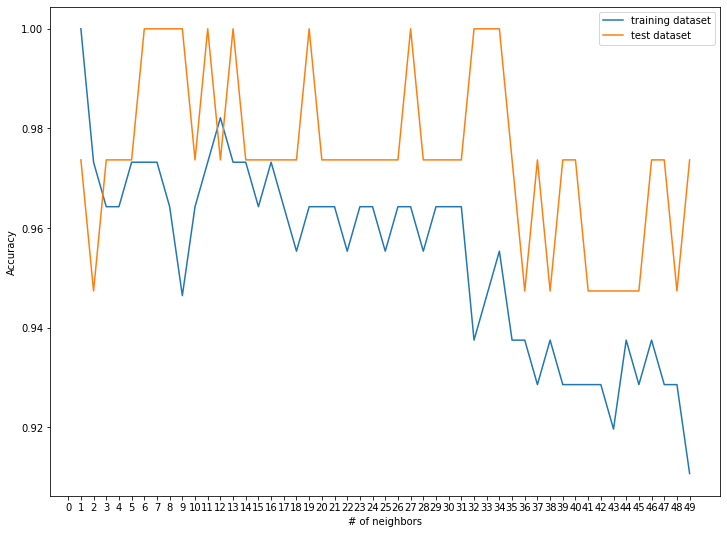

In [16]:
# 시각화를 통한 결과 확인

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(range(1,50), train_acc, label='training dataset')
plt.plot(range(1,50), test_acc, label='test dataset')
plt.xlabel("# of neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0,50,step=1))
plt.legend()